
i =

   0.0000 + 1.0000i


taux =

   -0.0270


tauy =

    0.0977


u10 =

   -0.6912


v10 =

    2.4999


dek =

   0.0000 +21.6341i



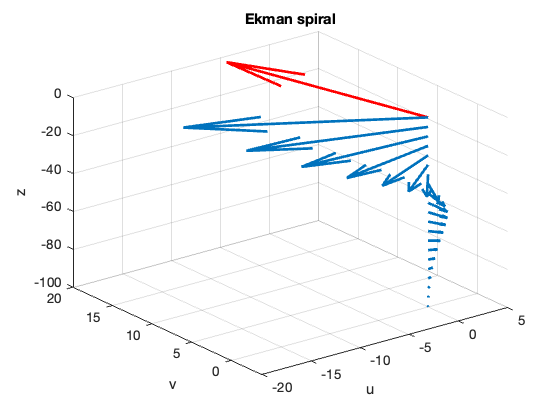

In [1]:
% Program to plot Ekman spiral
% Claudio Iturra, 2022 
% University of Concepcion, Chile.
% claudioiturra@icloud.com

% Input section

clear all; close all;
i=sqrt(-1)                   % To make sure i is the complex i
h=100;                       % Water depth
nut=.02;                     % (constant) turbulence viscosity
phi=-36;                      % Latitude (deg.)
rho=1000;                    % Water density

[taux,tauy,u10,v10] = wstress(-0.691195858091877,2.49985898304528,10)

tauwx=taux;                     % Wind shear stress x-direction
tauwy=tauy;                     % Wind shear stress y-direction
tau=tauwx+tauwy*i;           % Shear stress vector 
                             % in complex notation
f=2*7.27e-5*sin(phi*pi/180); % Coriolis coefficient
dek=sqrt(2*nut/f)            % Ekman depth
dz=5;                        % Vertical step size
zek=[-h:dz:0];               % Vertical coordinate
%% Define some additional matrices for plotting purposes
xek=zeros(size(zek));        
yek=zeros(size(zek));
taux=zeros(size(zek));
tauy=zeros(size(zek));
taux(end)=tauwx;
tauy(end)=tauwy;
%% Solution of Ekman spiral
s=tau*dek/rho/(1+i)/nut*exp((1+i)/dek*zek);
uek=real(s);
vek=imag(s);
%% Plot results
figure(1);
quiver3(xek,yek,zek,uek,vek,zeros(size(vek)),'linewidth',2);
hold on
quiver3(xek,yek,zek,taux,tauy,zeros(size(tauy)),'r','linewidth',2);
title('Ekman spiral')
xlabel('u');ylabel('v');
zlabel('z')
print('-dpng','ekman.png')
print('-depsc','ekman.eps')

